<a href="https://colab.research.google.com/github/Yoon0527/AI_study/blob/main/%5BChapter_4%5D_Neural_Network_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 4. 신경망 학습
학습이란 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것을 말한다. 특히 이번 장에서는 신경망이 학습할 수 있도록 해주는 지표인 '손실 함수(loss function)'에 대해 알아본다. 이 손실 함수의 결괏값을 가장 작게 만드는 가중치 매개변수를 찾는 것이 학습의 목표이다. 작게 만드는 방법 중 하나로 경사 하강법이 있음.

신경망의 특징은 데이터를 보고 학습할 수 있다는 점이다. 이는 사람이 수작업으로 매개 변수 값을 설정하는 것이 아닌 가중치 매개 변수의 값을 데이터를 보고 자동으로 결정한다는 것이다. 즉, 데이터가 굉장히 중요하다.

* 특징(Feature)
  * 이미지에서 특징을 추출해 그 특징의 패턴을 기계학습 기술로 학습한다.
  * 여기서 특징이란, 입력 데이터에서 중요한 데이터를 정확하게 추출할 수 있도록 설계된 변환기를 가리킨다.
  * 이미지의 특징은 보통 SIFT, SURF, HOG와 같은 특징을 사용해 **벡터**로 기술하는데, 이런 특징을 사옹해 이미지 데이터를 벡터로 변환하고, 변환된 벡터를 가지고 지도 학습 방식의 대표 분류 기법인 SVM, KNN 등으로 학습할 수 있다.
     * SIFT, SURF, HOG에 대한 자료: https://darkpgmr.tistory.com/116

즉, 신경망은 사람이 개입하지 않고 이미지의 특징을 찾아 패턴을 학습한다. 그래서 신경망(딥러닝)을 종단간 기계학습(end-to-end machine learning)이라고도 한다. 데이터(입력)에서 목표한 결과(출력)를 사람의 개입 없이 얻는다는 뜻을 담고 있다.

* 과대적합(Over Fitting)
  * 기계학습은 데이터를 training data와 test data로 나누어 학습과 실험을 수행하는 것이 일반적이다. 
  * training data를 사용해 학습하면서 최적의 매개변수를 찾고, 그 다음 test data를 사용해 훈련한 모델의 실력을 평가한다.
  * 두 데이터로 나누는 이유는 처음 본 이미지에서도 좋은 성능을 발휘하게 만들기 위해서이다. 나누지 않고 오로지 training data로만 학습한다면, 특정 데이터만 학습하게 되고, 한 데이터셋에만 지나치게 최적화되어 임의의 데이터의 패턴을 잘 발견하지 못하게되는 과대적합, 즉 오버피팅이 된다.

## 손실 함수
신경망 학습에서는 현재의 상태를 '하나의 지표'로 표현한다. 이 지표를 가장 좋게 만들어주는 가중치 매개변수의 값을 탐색하는 것이다. 신경망에서는 이 지표로 손실 함수를 사용한다. 손실 함수에도 종류가 있는데 일반적으로 '오차제곱합'과 '교차 엔트로피 오차'를 사용한다.

* 오차제곱합(sum of squares for error, SSE)
  * 각 원소의 출력(추정값)과 정답 레이블의 차를 제곱한 후, 그 총합을 구한다.
  * 자세한 내용과 수식은 책 112페이지를 참고.

In [ ]:
# 오차제곱합 구현해보기
import numpy as np

def sum_squares_error(y, t):
  return 0.5 * np.sum((y-t)**2)

# mnist 손글씨에서 숫자 2일 확률이 가장 높다고 추정
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]    # 정답 레이블, 원핫
y_2 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]    # 여기서는 '2'일 확률이 가장 높다고 추정(0.6)
print(sum_squares_error(np.array(y_2), np.array(t)))

# 숫자 7일 확률이 가장 높다고 추정
y_7 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(sum_squares_error(np.array(y_7), np.array(t)))

0.09750000000000003
0.5975


위 코드로 봤을 때, 오차제곱합은 정답과 추정 결과와의 오차가 적을 수록 정답에 가깝다고 판단할 수 있다.

* 교차 엔트로피 오차
  * 수식은 114페이지 참고.
  * 정답일 때의 추정의 자연로그를 계산하는 수식이다.
    * 정답 레이블은 원핫 인코딩 됐으므로 정답이 아닌 나머지는 모두 0이다. 그래서 log(y)와 곱해도 0이 되어 결과에 영향을 미치지 않는다.
  * 다시 읽을 때마다 그래프와 설명을 같이 읽을 것.

In [ ]:
# 교차 엔트로피 오차 구현해보기
def cross_entropy_error(y, t):    # y, t는 넘파이 배열이다.
  delta = 1e-7
  return -np.sum(t * np.log(y + delta))

# mnist 손글씨에서 숫자 2일 확률이 가장 높다고 추정
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]    # 정답 레이블, 원핫
y_2 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]    # 여기서는 '2'일 확률이 가장 높다고 추정(0.6)
print(cross_entropy_error(np.array(y), np.array(t)))

# 숫자 7일 확률이 가장 높다고 추정
y_7 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y_7), np.array(t)))

0.510825457099338
2.302584092994546


첫 번째 예는 정답일 때의 출력이 0.6이고, 이때 교차 엔트로피 오차는 약 0.51이다.

그 다음 정답일 때의 출력이 0.1일 때는 교차 엔트로피 오차가 2.3이다.

즉, 결과(오차 값)가 더 작은 첫 번째 추정이 정답일 가능성이 높다고 판단한 것이다.

>**delta를 더해주는 이유?**<br> 아주 작은 값인 1e-7인 delta를 더해주는 이유는 np.log() 함수에 0을 입력하면 마이너스 무한대를 뜻하는 -inf가 되어 더 이상 계산을 진행할 수 없게되기 때문이다. **아주 작은 값을 더해서 절대 0이 될 수 없도록, 즉 마이너스 무한대가 발생하지 않도록 한 것이다.**

* 미니배치 학습
  * 기계학습에서는 훈련 데이터에 대한 손실 함수의 값을 구하고, 그 값을 최대한 줄여주는 매개변수를 찾아낸다.
  * 이렇게 하려면 모든 훈련 데이터를 대상으로 손실 함수 값을 구해야 한다. 즉, 100개의 훈련 데이터가 있으면 그로부터 계산한 100개의 손실 함수 값들의 합을 지표로 삼는 것이다.
  * 지금까지는 데이터 하나에 대한 손실 함수 값을 구했지만 이제 모든 학습 데이터에 대한 것을 구해야 한다.
  * 데이터의 수가 많은 경우 데이터 일부를 추려 전체의 '근사치'로 이용할 수 있다.
  * 신경망 학습에서도 훈련 데이터 중 일부만 골라 학습을 수행한다. 
  * 이 일부를 **미니배치**라고 한다. 예를 들어 60000개의 데이터 중 무작위로 100장을 뽑아 학습에 사용하는 것이다. 이런 학습 방법을 미니배치 학습이라고 한다.

In [ ]:
# 미니배치 구현해보기
import tensorflow as tf
import numpy as np

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)

train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)   # 지정한 범위의 수 중에서 무작위로 원하는 개수만 꺼낸다.
x_batch = x_train[batch_mask]
y_batch = y_train[batch_mask]

(60000, 28, 28)
(60000,)


In [ ]:
np.random.choice(60000, 10)   # 60000 이하의 숫자 중 무작위로 10개 뽑는다.

array([29586, 12056, 53180, 25271, 11821, 20006, 50927, 25933, 21479,
       43189])

무작위로 뽑은 수를 미니배치로 뽑아낼 데이터의 인덱스로 사용한다.

In [ ]:
# 배치용 교차 엔트로피 오차 구현해보기
def cross_entropy_error(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  batch_size = y.shape[0]
  return -np.sum(t * np.log(y + 1e-7)) / batch_size

y는 신경망의 출력, t는 정답 레이블이다. 

y가 1차원이라면, 즉 데이터 하나당 교차 엔트로피 오차를 구하는 경우는 reshape 함수로 데이터의 형상을 바꿔준다. 그리고 배치의 크기로 나눠 정규화하고 이미지 1장당 평균의 교차 엔트로피 오차를 계산한다.

In [ ]:
# 정답 레이블이 원핫인코딩이 아니라 숫자 레이블로 주어졌을 때의 교차 엔트로피 오차 구현해보기
def cross_entropy_error(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  batch_size = y.shape[0]
  return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

> **왜 손실 함수를 설정하는가?**<br>신경망의 학습 지표로 '정확도'가 아닌 '손실 함수의 값'을 설정하는 이유는 신경망 학습에서의 **미분**의 역할에 주목해야 하는데, 자세한 내용은 119페이지를 볼 것. 읽기 전에 정확도와 손실 함수의 값 각각을 미분했을 때의 차이를 생각해보고 읽을 것.(반복적으로 읽어서 완벽하게 이해하자) 

In [1]:
# 수치 미분
def numerical_diff(f, x):
  h = 1e-4 #0.0001
  return (f(x+h) - f(x-h)) / (2*h)

In [2]:
# 식 4.5를 구현
def function_1(x):
  return 0.01*x**2 + 0.1*x

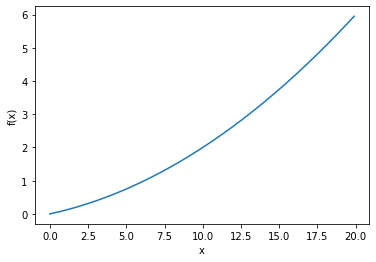

In [3]:
# 그래프
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.show()

In [4]:
# x=5, x=10일 때 이 함수의 미분을 계산해보자
numerical_diff(function_1, 5)

0.1999999999990898

In [6]:
numerical_diff(function_1, 10)

0.2999999999986347

이렇게 계산한 미분 값이 x에 대한 f(x)에 대한 변화량이다. 즉, 함수의 기울기에 해당한다. 

편미분은 변수가 2개라는 점에 주의해야한다. 

In [ ]:
# 편미분
def function_2(x):
  return np.sum(x**2)
  # 또는 x[0]**2 + x[1]**2

## 경사법(경사 하강법)
> 이전 부분(미분)은 시간 날 때마다 책을 직접 읽는게 나을 것 같아서 코드와 코드에 대한 설명들 외에 이론 전부는 정리하지않음.

기계학습 문제 대부분은 학습 단계에서 최적의 매개변수를 찾아낸다. 신경망 역시 최적의 매개변수(가중치와 편향)을 학습 시에 찾아야 한다. 여기에서 최적이란 손실 함수가 최솟값이 될 때의 매개변수 값이다. 

그러나 일반적인 문제의 손실 함수는 매우 복잡하다. 매개변수 공간이 광범위하여 어디가 최솟값이 되는 곳인지를 짐작할 수 없다. 이런 상황에서 기울기를 잘 이용해 함수의 최솟값(또는 가능한 작은 값)을 찾으려는 것이 경사법이다. 

In [ ]:
# 편미분
def function_tmp1(x0):
  return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [ ]:
def function_tmp2(x1):
  return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

In [ ]:
# 기울기
def numerical_gradient(f, x):
  h = 1e-4
  grad = np.zeros_like(x) # x와 형상이 같은 배열 생성

  for idx in range(x.size):
    tmp_val = x[idx]